# Lifecycle of ML Project

1. Understand the pribelm statement
2. Data Collection
3. Data Checks to perform
4. EDA
5. Data Pre - Processing
6. Model Training
7. Best Model

# Problem Statement

This shows how the student's performance is affected by gender, race, parent education

Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


Import the csv file

In [3]:
df = pd.read_csv('data/student.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

# Data Checks to perform

1. Missing values
2. Duplicates
3. Data Type
4. Unique values of each column
5. Statistics of dataset
6. various category present in various categorical column

In [5]:
# Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Unique values in column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# Statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights from the Data check

1. From above description of numerical data, the mean ranges from 66 to 68
2. The std of the data is from 14.6 to 15.19
3. The Minimum for math is 0, reading is 17, writing is 10
4. The Maximum for all the numerical columns is 100

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
print("Categories in gender variables: ", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variables: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variables: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variables: ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variables: ", end=" ")
print(df['test preparation course'].unique())

Categories in gender variables:  ['female' 'male']
Categories in race/ethnicity variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variables:  ['standard' 'free/reduced']
Categories in test preparation course variables:  ['none' 'completed']


Define numerical and categorical features

In [14]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(num_features)} Numerical feature : {num_features}")
print(f"We have {len(cat_feature)} Categorical feature : {cat_feature}")

We have 3 Numerical feature : ['math score', 'reading score', 'writing score']
We have 5 Categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Add column for Total score and Average

This is the Dependent feature

In [15]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
read_full = df[df['reading score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()
write_full = df[df['writing score'] == 100]['Average'].count()

print(f"NO of students got full marks in Reading: {read_full}")
print(f"NO of students got full marks in Maths: {math_full}")
print(f"NO of students got full marks in Writing: {write_full}")

NO of students got full marks in Reading: 17
NO of students got full marks in Maths: 7
NO of students got full marks in Writing: 14


In [18]:
read_less20 = df[df['reading score'] <= 20]['Average'].count()
math_less20 = df[df['math score'] <= 20]['Average'].count()
write_less20 = df[df['writing score'] <= 20]['Average'].count()

print(f"NO of students got full marks in Reading: {read_less20}")
print(f"NO of students got full marks in Maths: {math_less20}")
print(f"NO of students got full marks in Writing: {write_less20}")

NO of students got full marks in Reading: 1
NO of students got full marks in Maths: 4
NO of students got full marks in Writing: 3


# Insights

1. We got best performance in reading section
2. There are 7 poor performing records

# Visualization

1. Histogram
2. Kernel Distribution Function (KDF)

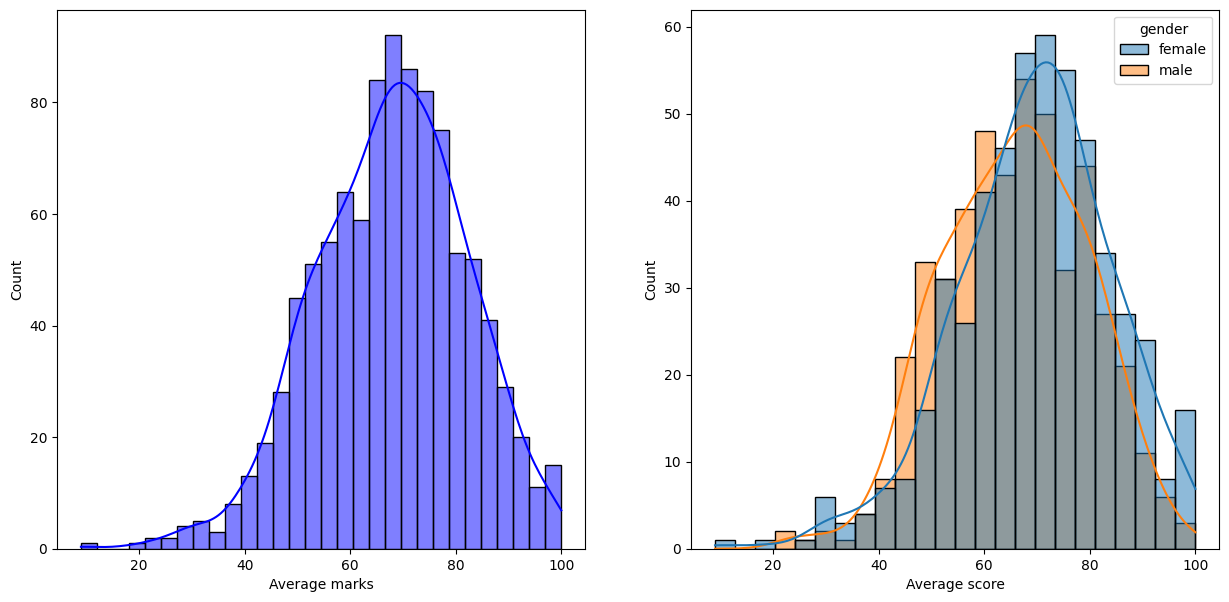

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average',bins=30, kde=True, color='b')
plt.xlabel('Average marks')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True,hue='gender')
plt.xlabel('Average score')
plt.show()

# Insight

1. The female students perform well in exams according to average

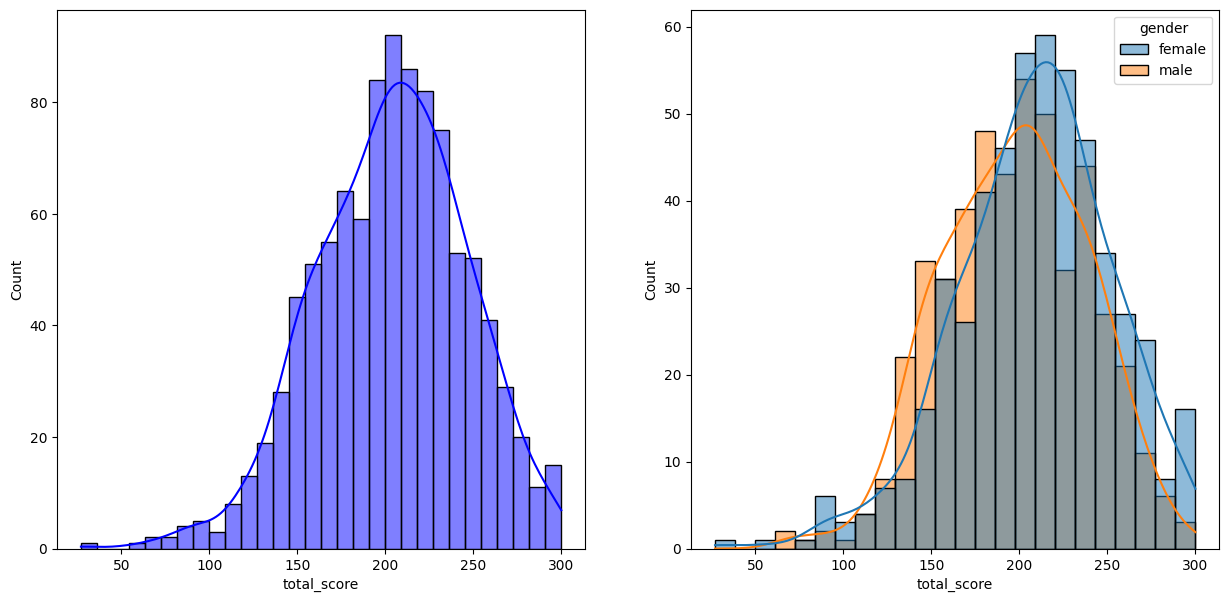

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True,hue='gender')
plt.show()

# Insight

1. The female students perform well in exams according to total_score 